In [7]:
import os
import sys
import tarfile
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

%matplotlib inline

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data (housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [8]:
fetch_housing_data()

housing = load_housing_data()

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

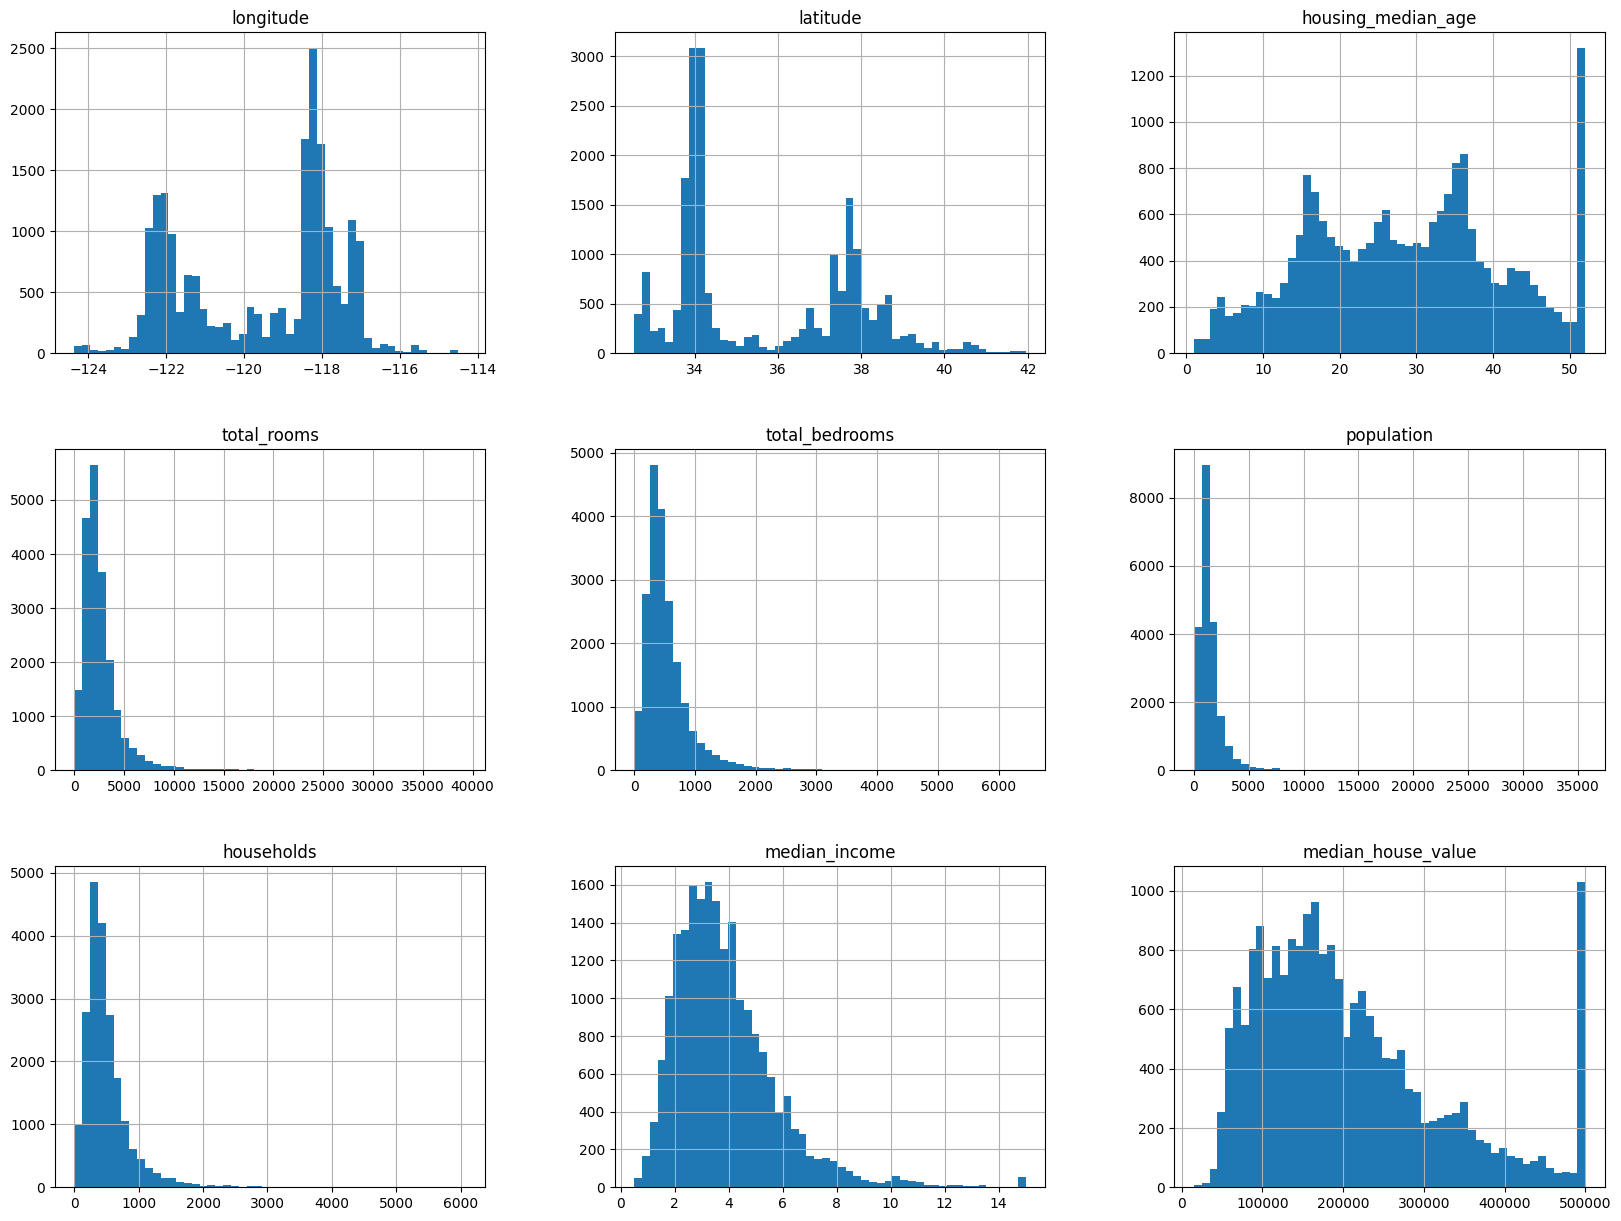

In [10]:
housing.hist(bins=50, figsize=(20,15))

In [11]:
# train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [12]:
# sys.path

In [13]:
# train_set.head(10)

In [14]:
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins = [0.,1.5, 3.0, 4.5, 6.0, np.inf],
                              labels = [1, 2, 3, 4, 5])

<AxesSubplot: >

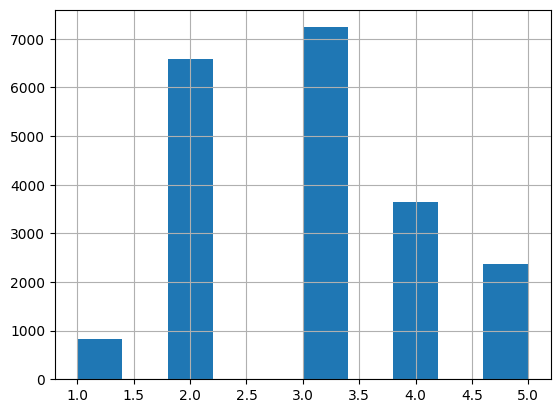

In [15]:
housing['income_cat'].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [17]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [18]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

<AxesSubplot: >

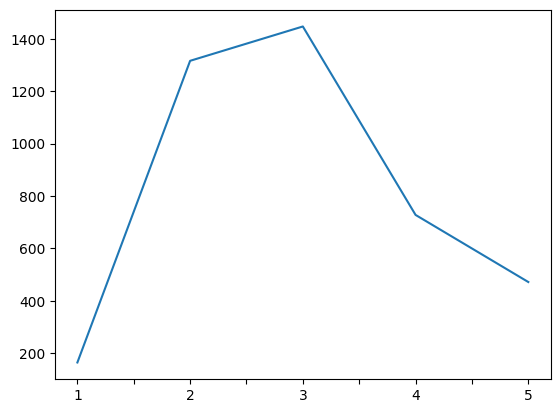

In [19]:
strat_test_set['income_cat'].value_counts().sort_index(ascending=True).plot()

In [20]:
for set_ in (strat_test_set, strat_train_set):
    set_. drop("income_cat", axis=1, inplace=True)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

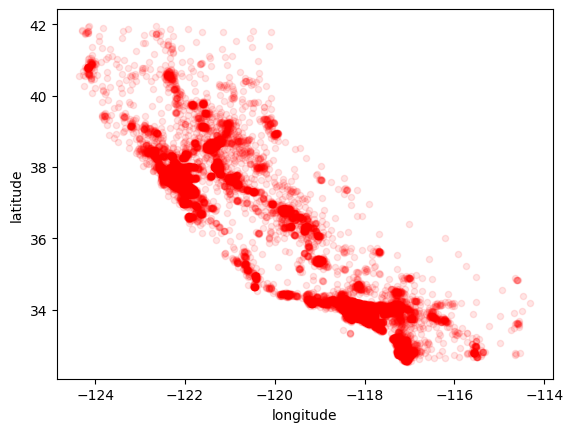

In [21]:
housing.plot(kind="scatter", x = 'longitude', y = 'latitude', alpha = 0.1, color='r')

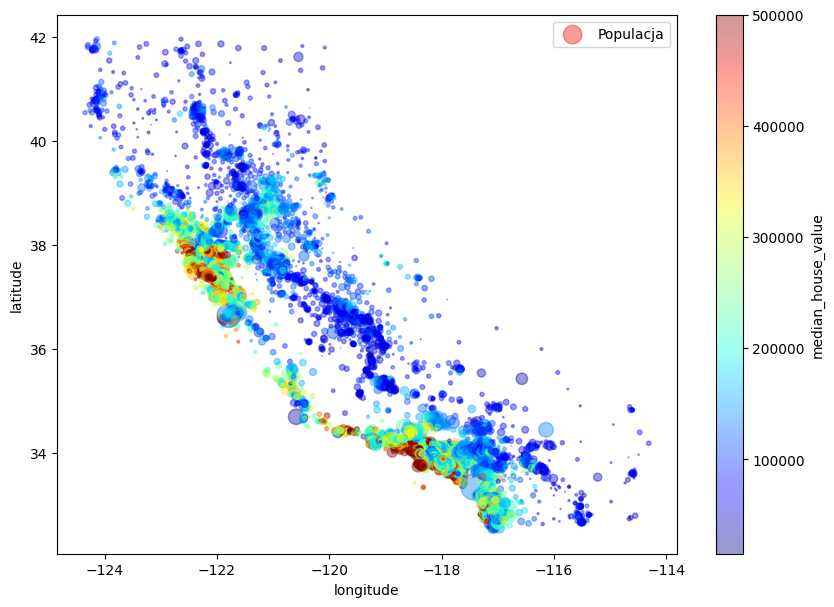

In [39]:
housing.plot(kind='scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
            s=housing['population']/100, label='Populacja', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [82]:
#szukanie obiecującej korelacji
corr_matrix = housing.corr(numeric_only=1)
corr_matrix['median_house_value'].sort_values(ascending=0)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

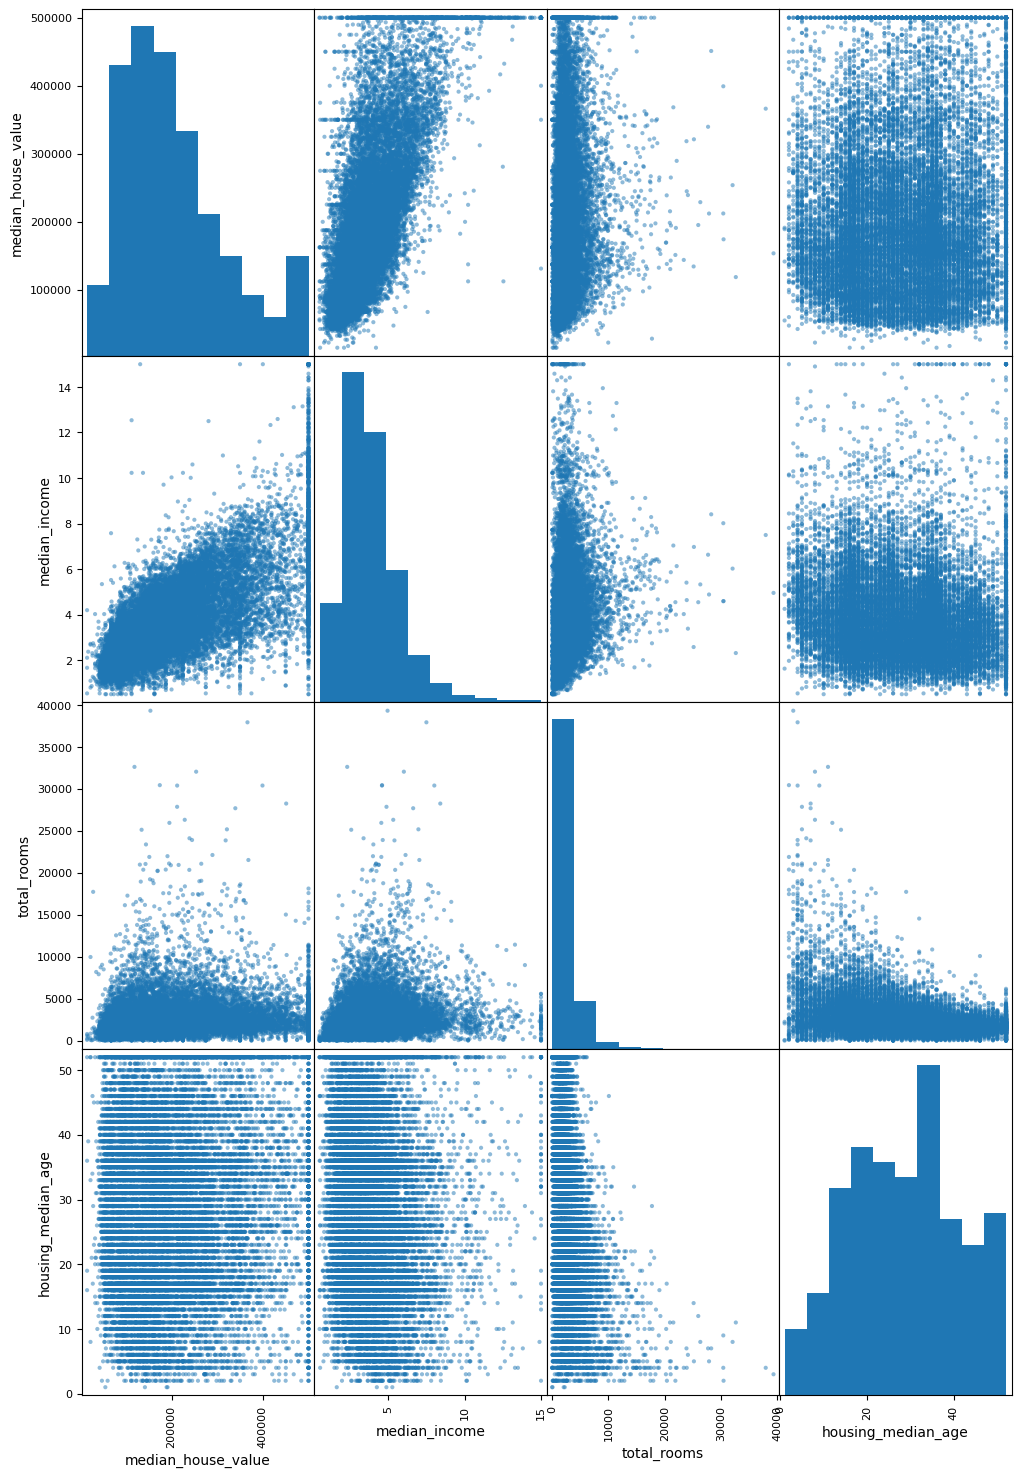

In [87]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms',
             'housing_median_age']

scatter_matrix(housing[attributes], figsize=(12,18))

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

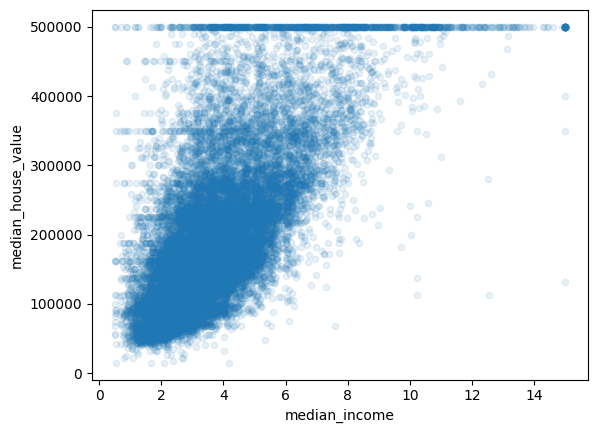

In [89]:
housing.plot(kind='scatter', x='median_income', y= 'median_house_value', alpha=0.1)

#ale jak sie pozbyc tych artefaktów?

In [97]:
housing['Pokoje_na_rodzine'] = housing['total_rooms'] / housing['households']
housing['Sypialnie_na_pokoje'] = housing['total_bedrooms'] / housing['total_rooms']
housing['Populacja_na_rodzine'] = housing['population'] / housing['households']

In [103]:
corr_matrix = housing.corr(numeric_only=1)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688075
Pokoje_na_rodzine       0.151948
total_rooms             0.134153
housing_median_age      0.105623
households              0.065843
total_bedrooms          0.049686
Populacja_na_rodzine   -0.023737
population             -0.024650
longitude              -0.045967
latitude               -0.144160
Sypialnie_na_pokoje    -0.255880
Name: median_house_value, dtype: float64

<AxesSubplot: xlabel='Pokoje_na_rodzine', ylabel='median_house_value'>

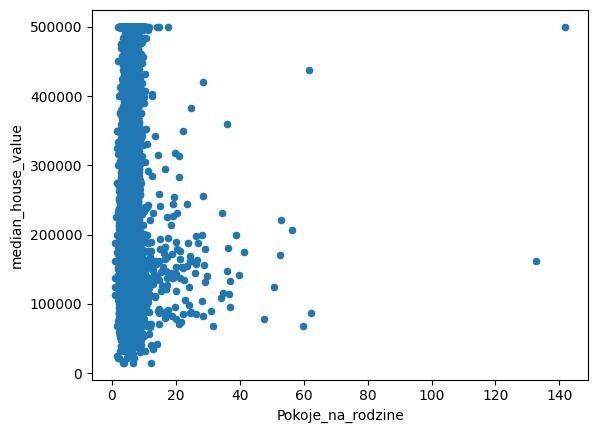

In [107]:
housing.plot(kind='scatter', x='Pokoje_na_rodzine', y= 'median_house_value')

#ustalilismy ze jest wyzsza korelacja w zmodyfikowanym trybucie niz przy samych tylko pokojach,
#ale korelacja jest tak niewielka ze nie szedłbymw. ta stronę na ten moment

In [113]:
strat_train_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [118]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [128]:
# import missingno as msno

ModuleNotFoundError: No module named 'missingno'

In [130]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [137]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

housing_num= housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [138]:
X = imputer.transform(housing_num)

In [140]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

In [141]:
housing_tr.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [145]:
housing_cat=housing[['ocean_proximity']]

In [146]:
# from sklearn.preprocessing import OrdinalEncoder

# ordinal_encoder = OrdinalEncoder()

# housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
# housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [147]:
from sklearn.preprocessing import OneHotEncoder

ordinal_encoder = OneHotEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [151]:
#pipeline ustawia kilka polecen w ciagu

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [158]:
df = pd.DataFrame(housing_num_tr)
df

,0,1,2,3,4,5,6,7
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752
...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374
16508,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509
16509,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475
16510,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261


In [167]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [169]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [173]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("prognozy:", lin_reg.predict(some_data_prepared))
print('labels:', list(some_labels))

prognozy: [ 89216. 301184. 154240. 180224. 247936.]
labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [178]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_mse = np.sqrt(lin_mse)
lin_mse

69070.22263008768

In [179]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [180]:
housing_predictions = tree_reg.predict(housing_prepared)
tre_mse = mean_squared_error(housing_labels, housing_predictions)
tre_mse = np.sqrt(tre_mse)
tre_mse

0.0

In [181]:
# mamy wybrany model
# teraz moznaby jeszcze raz zbior uczacy podzielic na podzbiory i za jego
# pomoca testowac model, ale lepsza moze sie okazac kroswalidacja

In [182]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [183]:
def display_scores(scores):
    print('Wyniki:', scores)
    print('Średnia:', scores.mean())
    print('Odchylenie standardowe: ', scores.std())

In [186]:
display_scores(tree_rmse_scores)

Wyniki: [70353.25317625 68557.98575439 64517.54872653 70352.77116577
 66592.83195929 67763.01894788 72052.05857685 69825.1977537
 66922.51104249 71637.96123429]
Średnia: 68857.51383374314
Odchylenie standardowe:  2287.8242885655714


In [202]:
scores_lin = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-scores_lin)

In [203]:
display_scores(lin_rmse_scores)

Wyniki: [72218.9990382  65339.87886612 67813.37518334 69466.23571363
 66760.88577016 73059.17306177 70530.10250275 69527.87083471
 66949.27143837 70750.1670309 ]
Średnia: 69241.59594399571
Odchylenie standardowe:  2370.214373291473


In [204]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [205]:
forest_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, forest_predictions)
forest_mse = np.sqrt(forest_mse)
forest_mse

18466.615125183533

In [208]:
scores_forest = cross_val_score(forest_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv = 10)
forest_rmse_scores = np.sqrt(-scores_forest)

KeyboardInterrupt: 

In [209]:
display_scores(forest_rmse_scores)

Wyniki: [50743.52682325 49226.9773934  46121.5793812  50556.51876857
 47194.14993536 49438.4622814  51523.81461211 48948.75602851
 47836.55850234 52815.50725682]
Średnia: 49440.58509829645
Odchylenie standardowe:  1938.9587329859091


In [216]:
import joblib

joblib.dump(lin_reg, 'my_sklearn_model_joblib')

['my_sklearn_model_joblib']

In [217]:
my_lin_model = joblib.load('my_sklearn_model_joblib')

In [220]:
my_lin_model.predict(housing_prepared)

array([ 89216., 301184., 154240., ..., 222720., 242560., 100352.])

In [ ]:
#za pomoca GridSearchCV - przeszukiwanie siatki mozemy znalezc najlepsze hiperparametry do modeli
# str.96 jak to ustawic, kolejne rozdzialy jak dobierac parametry


In [ ]:
#RandomizedSearchCv
#Metody zespołowe
#Analiza modeli i wrzucanie danych testowych